# New York Cab Fare Prediction Project
You are a cab rental start-up company. You have successfully run the pilot project and now want to launch your cab service across the country. You have collected the historical data from your pilot project and now have a requirement to apply analytics for fare prediction. You need to design a system that predicts the fare amount for a cab ride in the city.

# Objective
To predict the fare amount of a taxi ride in New York city.

# Data Files
Train Dataset = train_cab.csv

Test Dataset = test_cab.csv

# Data Dictionary

pickup_datetime - timestamp value indicating when the cab ride started.

pickup_longitude - float for longitude coordinate of where the cab ride started.

pickup_latitude - float for latitude coordinate of where the cab ride started.

dropoff_longitude - float for longitude coordinate of where the cab ride ended.

dropoff_latitude - float for latitude coordinate of where the cab ride ended.

passenger_count - an integer indicating the number of passengers in the cab ride.

Train Dataset has 16067 rows and 7 columns.

Test Dataset has 9914 rows and 6 columns.

# Importing the libraries

In [1]:
#Loading Required Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import chi2_contingency

In [2]:
#Loading the required dataset
cab_train= pd.read_csv("train_cab.csv")
cab_test= pd.read_csv("test_cab.csv")

<h3> Understanding the data</h3><br>
Taking a look into the top 5 rows of both train and test data so that we can get some insights to it. Cheking the data types of each feature and the shape of both train and test data. Later using describe() we are looking into the min.,max, 50%, 25%, 75%, std and mean of each predictors.

In [3]:
cab_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [4]:
cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [5]:
print("shape of training data is: ",cab_train.shape) #checking the number of rows and columns in training data
print("shape of test data is: ",cab_test.shape) #checking the number of rows and columns in test data

shape of training data is:  (16067, 7)
shape of test data is:  (9914, 6)


In [6]:
#Looking at the datatypes of different features in train dataset
cab_train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [7]:
cab_test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [8]:
cab_train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [9]:
cab_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


<h3> Exploratory Data Analysis(EDA)</h3>

In [10]:
 #dropping NA values in datetime column
cab_train.dropna(subset= ["pickup_datetime"])  

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [11]:
cab_train.shape

(16067, 7)

In [12]:
# converting datatype of fare amount to numeric
cab_train['fare_amount']=pd.to_numeric(cab_train['fare_amount'], errors= 'coerce')
cab_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [13]:
#Converting the the data type of pickup_datetime to timestamp for train dataset
cab_train['pickup_datetime']= pd.to_datetime(cab_train.pickup_datetime, errors= "coerce")

In [14]:
#Extracting pickup date, day, month, hour and minute from pickup_datetime
cab_train['pickup_date']= cab_train.pickup_datetime.dt.day
cab_train['pickup_hour']= cab_train.pickup_datetime.dt.hour
cab_train['pickup_month']= cab_train.pickup_datetime.dt.month
cab_train['pickup_weekday']= cab_train.pickup_datetime.dt.weekday
cab_train['pickup_minute']= cab_train.pickup_datetime.dt.minute

In [15]:
cab_train.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
pickup_date                      float64
pickup_hour                      float64
pickup_month                     float64
pickup_weekday                   float64
pickup_minute                    float64
dtype: object

In [16]:
#Converting the the data type of pickup_datetime to timestamp for test dataset
cab_test['pickup_datetime']= pd.to_datetime(cab_test.pickup_datetime, errors= "coerce")

In [17]:
cab_test['pickup_date']= cab_test.pickup_datetime.dt.day
cab_test['pickup_hour']= cab_test.pickup_datetime.dt.hour
cab_test['pickup_month']= cab_test.pickup_datetime.dt.month
cab_test['pickup_weekday']= cab_test.pickup_datetime.dt.weekday
cab_test['pickup_minute']= cab_test.pickup_datetime.dt.minute

In [18]:
cab_test.dtypes

pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
pickup_date                        int64
pickup_hour                        int64
pickup_month                       int64
pickup_weekday                     int64
pickup_minute                      int64
dtype: object

In [19]:
cab_train = cab_train.drop(cab_train[cab_train['pickup_datetime'].isnull()].index, axis=0)
print(cab_train.shape)
print(cab_train['pickup_datetime'].isnull().sum())

(16066, 12)
0


In [20]:
cab_train['passenger_count'].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [21]:
#As we can see here the maximum no. of passenger count is 5345 which is not possible. so reducing the passenger count to 6 i.e
#maximum in case of SUV
cab_train= cab_train.drop(cab_train[cab_train['passenger_count']>6].index, axis=0)
print(cab_train.shape)

(16046, 12)


In [22]:
cab_train['passenger_count'].describe()

count    15991.000000
mean         1.643701
std          1.267504
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [23]:
cab_train= cab_train.drop(cab_train[cab_train['passenger_count']== 0].index, axis=0)

In [24]:
cab_train.shape

(15989, 12)

In [25]:
#Removing row whose passenger count is 0.12 , which is not possible
cab_train= cab_train.drop(cab_train[cab_train['passenger_count']== 0.12].index, axis=0)

In [26]:
#removing passanger_count missing values rows
cab_train = cab_train.drop(cab_train[cab_train['passenger_count'].isnull()].index, axis=0)
print(cab_train.shape)
print(cab_train['passenger_count'].isnull().sum())

(15933, 12)
0


In [27]:
#Dealing with fare amount, deleting rows whose fare amount is -ve and 0
cab_train = cab_train.drop(cab_train[cab_train['fare_amount']< 1].index, axis=0)

In [28]:
print(cab_train.shape)

(15928, 12)


In [29]:
cab_train["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15928, dtype: float64

In [30]:
#Now we can see that there is a huge difference in 1st 2nd and 3rd position in decending order of fare amount
# so we will remove the rows having fare amounting more that 454 as considering them as outliers

cab_train = cab_train.drop(cab_train[cab_train["fare_amount"]> 454 ].index, axis=0)
cab_train.shape

(15926, 12)

In [31]:
# eliminating rows for which value of "fare_amount" is missing
cab_train = cab_train.drop(cab_train[cab_train['fare_amount'].isnull()].index, axis=0)
print(cab_train.shape)
print(cab_train['fare_amount'].isnull().sum())

(15902, 12)
0


In [32]:
cab_train['fare_amount'].describe()

count    15902.000000
mean        11.376356
std         10.814908
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [33]:
#Lattitude----(-90 to 90)
#Longitude----(-180 to 180)

# we need to drop the rows having  pickup lattitute and longitute out the range mentioned above

#train = train.drop(train[train['pickup_latitude']<-90])
cab_train[cab_train['pickup_latitude']<-90]
cab_train[cab_train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_hour,pickup_month,pickup_weekday,pickup_minute
5686,3.3,2011-07-30 11:15:00+00:00,-73.947235,401.083332,-73.951392,40.778927,1.0,30.0,11.0,7.0,5.0,15.0


In [34]:
#Hence dropping value of >90 and <-90
cab_train = cab_train.drop((cab_train[cab_train['pickup_latitude']<-90]).index, axis=0)
cab_train = cab_train.drop((cab_train[cab_train['pickup_latitude']>90]).index, axis=0)

In [35]:
cab_train[cab_train['pickup_longitude']<-180]
cab_train[cab_train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_hour,pickup_month,pickup_weekday,pickup_minute


In [36]:
cab_train.shape

(15901, 12)

In [37]:
#Checkinh Missinng Value in both train and test dataset
cab_train.isnull().sum()


fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_date          0
pickup_hour          0
pickup_month         0
pickup_weekday       0
pickup_minute        0
dtype: int64

In [38]:
cab_test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_date          0
pickup_hour          0
pickup_month         0
pickup_weekday       0
pickup_minute        0
dtype: int64

In [39]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [40]:
#Calculating distane and storing them in new feature named distance in Training dataset
cab_train['distance'] = cab_train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [41]:
#Calculating distane and storing them in new feature named distance in Test dataset
cab_test['distance'] = cab_test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [42]:
cab_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_hour,pickup_month,pickup_weekday,pickup_minute,distance
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,15.0,17.0,6.0,0.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,5.0,16.0,1.0,1.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,18.0,0.0,8.0,3.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,21.0,4.0,4.0,5.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,9.0,7.0,3.0,1.0,51.0,1.999157


In [43]:
cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_hour,pickup_month,pickup_weekday,pickup_minute,distance
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,27,13,1,1,8,2.323259
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,27,13,1,1,8,2.425353
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,8,11,10,5,53,0.618628
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,1,21,12,5,12,1.961033
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,1,21,12,5,12,5.387301


In [44]:
##finding decending order of fare to get to know whether the outliers are presented or not
cab_train['distance'].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
13050       0.000000
11593       0.000000
2346        0.000000
8331        0.000000
1637        0.000000
Name: distance, Length: 15901, dtype: float64

In [45]:
#As we can see that top 23 values in the distance variables are very high It means more than 8000 Kms distance they have 
#travelled Also just after 23rd value from the top, the distance goes down to 127, which means these values are showing some
#outliers We need to remove these values

###we will remove the rows whose distance value is zero

cab_train = cab_train.drop(cab_train[cab_train['distance']== 0].index, axis=0)
cab_train.shape

(15447, 13)

In [46]:
#We will remove the rows whose distance values is very high which is more than 129kms
cab_train = cab_train.drop(cab_train[cab_train['distance'] > 130 ].index, axis=0)
cab_train.shape

(15424, 13)

In [47]:
cab_train['distance'].isnull().sum()

0

In [48]:
#Droping feature related to pickup and dropoff
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']
cab_train = cab_train.drop(drop, axis = 1)

In [49]:
cab_train.head()

,fare_amount,passenger_count,pickup_date,pickup_hour,pickup_month,pickup_weekday,pickup_minute,distance
0,4.5,1.0,15.0,17.0,6.0,0.0,26.0,1.030764
1,16.9,1.0,5.0,16.0,1.0,1.0,52.0,8.450134
2,5.7,2.0,18.0,0.0,8.0,3.0,35.0,1.389525
3,7.7,1.0,21.0,4.0,4.0,5.0,30.0,2.799270
4,5.3,1.0,9.0,7.0,3.0,1.0,51.0,1.999157


In [50]:
cab_train.dtypes

fare_amount        float64
passenger_count    float64
pickup_date        float64
pickup_hour        float64
pickup_month       float64
pickup_weekday     float64
pickup_minute      float64
distance           float64
dtype: object

In [51]:
cab_train['passenger_count'] = cab_train['passenger_count'].astype('category')
cab_train['pickup_date'] = cab_train['pickup_date'].astype('int64')
cab_train['pickup_month'] = cab_train['pickup_month'].astype('int64')
cab_train['pickup_weekday'] = cab_train['pickup_weekday'].astype('int64')
cab_train['pickup_minute'] = cab_train['pickup_minute'].astype('int64')
cab_train['pickup_hour'] = cab_train['pickup_hour'].astype('int64')

In [52]:
#dropping features from test data
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']
cab_test = cab_test.drop(drop_test, axis = 1)

In [53]:
cab_test.head()

,passenger_count,pickup_date,pickup_hour,pickup_month,pickup_weekday,pickup_minute,distance
0,1,27,13,1,1,8,2.323259
1,1,27,13,1,1,8,2.425353
2,1,8,11,10,5,53,0.618628
3,1,1,21,12,5,12,1.961033
4,1,1,21,12,5,12,5.387301


In [54]:
cab_test.dtypes

passenger_count      int64
pickup_date          int64
pickup_hour          int64
pickup_month         int64
pickup_weekday       int64
pickup_minute        int64
distance           float64
dtype: object

<h3> Correlational Analysis </h3>

In [55]:
################## Feature Selection #######################
#Correlational Analysis
#Correlational Plot
cnames=['pickup_date','pickup_hour','pickup_month','pickup_minute','distance_travelled','pickup_weekday','fare_amount']
cab_data_corr= cab_train.loc[:, cnames]

D:\python\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


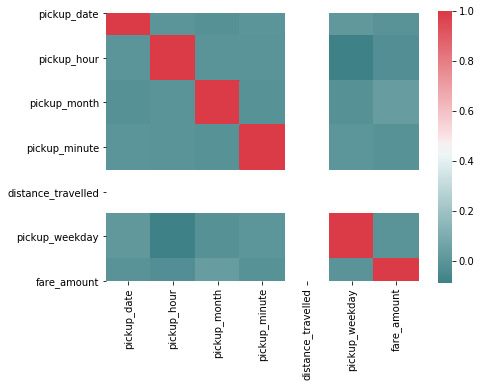

In [56]:
#Setting the height and width of the plot
f, ax= plt.subplots(figsize=(7,5))
#generating correlation matrix
corr= cab_data_corr.corr()
#Ploting using seaborn library
sns.heatmap(corr, mask= np.zeros_like(corr, dtype= np.bool), cmap= sns.diverging_palette(200, 10, as_cmap= True),
           square= True, ax=ax)

<h3> Feature Scaling </h3>

fare_amount


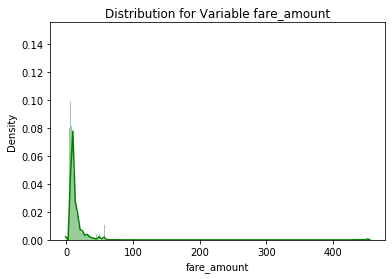

distance


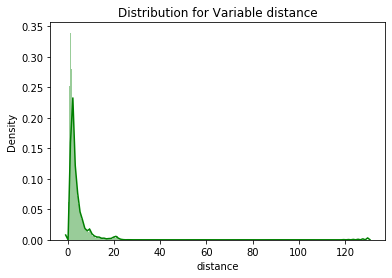

In [57]:
#Checking the distribution of fare_amount and distance in training dataset-

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(cab_train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [58]:
# We can clearly see that fare_amount and distance both are right skewed apply log transform to reduce the skewness in train dataset
cab_train['fare_amount'] = np.log1p(cab_train['fare_amount'])

cab_train['distance'] = np.log1p(cab_train['distance'])

fare_amount


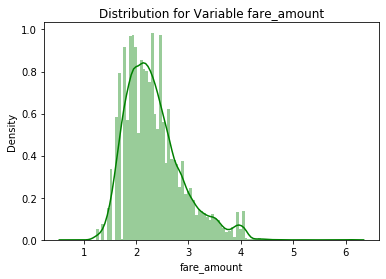

distance


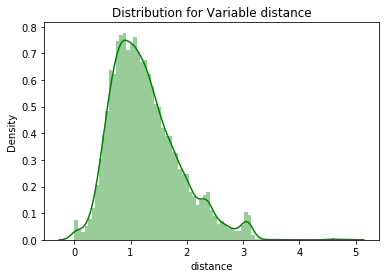

In [59]:
#Checking the distribution of fare_amount and distance in training dataset after log transform

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(cab_train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

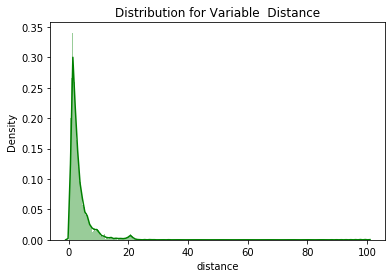

In [60]:
#Checking the distribution of distance in training datase
sns.distplot(cab_test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable  Distance")
plt.ylabel("Density")
plt.show()

In [61]:
#We can clearly see that distance is right skewed apply log transform to reduce the skewness in test dataset
cab_test['distance'] = np.log1p(cab_test['distance'])

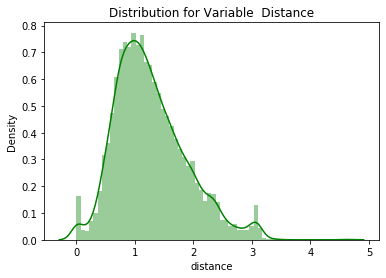

In [62]:
#Checking the distribution of distance in test dataset after log transform

sns.distplot(cab_test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable  Distance")
plt.ylabel("Density")
plt.show()

In [63]:
#Mape Function
def MAPE(y, yhat): 
    mape = np.mean(np.abs((y - yhat) / y))*100
    print("MAPE:", mape)

#RMSE Function
def RMSE(y_test,yhat):
    mse = np.mean((y_test-yhat)**2)
    print("Mean Square : ",mse)
    rmse=np.sqrt(mse)
    print("Root Mean Square : ",rmse)

In [64]:
# Splitting the data into training set and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(cab_train, test_size=0.2)

<h3> Linear Regression</h3>

In [65]:
####################### LINEAR REGRESSION ##################
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(train.iloc[:, 1:8], train.iloc[:, 0])
predictions_LR= regressor.predict(test.iloc[:, 1:8])


<h3> Decision Tree </h3>

In [66]:
########################### Decision Tree ############
from sklearn.tree import DecisionTreeRegressor
regressor_DT = DecisionTreeRegressor(max_depth=10).fit(train.iloc[:,1:8], train.iloc[:,0])
predictions_DT = regressor_DT.predict(test.iloc[:,1:8])

<h3> Random Forest </h3>

In [67]:
####################### Random Forest #########################
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor(n_estimators = 200, max_depth= 7).fit(train.iloc[:,1:8], train.iloc[:,0])
RF_Predictions = regressor_RF.predict(test.iloc[:,1:8])

<h3> Model Evaluation </h3>

In [68]:
#Mape for Linear Regression
MAPE(test.iloc[:,0],predictions_LR)
RMSE(test.iloc[:,0],predictions_LR)

MAPE: 8.014704111327614
Mean Square :  0.08707720476516914
Root Mean Square :  0.2950884693870114


In [69]:
#Mape for Decision Tree
MAPE(test.iloc[:,0],predictions_DT)
RMSE(test.iloc[:,0],predictions_DT)

MAPE: 8.72061128623213
Mean Square :  0.10721301293289663
Root Mean Square :  0.32743398255663175


In [70]:
#Mape for Random Forest
MAPE(test.iloc[:,0],RF_Predictions)
RMSE(test.iloc[:,0],RF_Predictions)

MAPE: 7.710725731416113
Mean Square :  0.07189951078660768
Root Mean Square :  0.2681408413252403


<h3> Applying Grid Search to Random Forest for hyper parameter tuning </h3>

In [71]:
# As we know the given problem is a regression so we are considering two performance metrics:-
#1) MAPE (2) RMSE
# Suppose Predicted cab fare_amount is 100 and the actual is 102, then here we will not see the difference
#in error i.e 2 but we will calculate the percentage error which is 2%. Again, if the predicted fare_amount
# is 10 instead of 12, error difference is again 2 but the percentage error is 20% .So we will be considering
# MAPE as our error metrics
#As we can see clearly see the value of both the Error Metrics i.e MAPE and RMSE both are minimum for Random Forest model
# and value of R-square is also higher for Random Forest. So Choosing Random Forest as our Final Model and 
#applying grid search to find the best value of hyper-parameters
from sklearn.model_selection import GridSearchCV
parameters= [{'max_depth': [2,5,7,8,10], 'n_estimators' : [10, 100, 200, 300, 400, 500]}]

grid_search= GridSearchCV(estimator = regressor_RF, param_grid= parameters, cv= 5, n_jobs= -1)
grid_search= grid_search.fit(train.iloc[:,1:8], train.iloc[:, 0])

In [72]:
#Calculating the best value of the provided hyper-parameter
best_param= grid_search.best_params_

In [73]:
best_param

{'max_depth': 7, 'n_estimators': 200}

In [74]:
print(grid_search.best_score_)

0.7801386148528859


<h3> Applying K Fold Cross Validation </h3>

In [75]:
#Applying K Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator= regressor_RF, X= train.iloc[:,1:8], y= train.iloc[:,0], cv= 10)
accuracies.mean()


0.7806494458860607

In [76]:
#Applying model on test data
prediction_test_RF= regressor_RF.predict(cab_test)

In [77]:
prediction_test_RF

array([2.27603455, 2.30734945, 1.71122784, ..., 3.96144126, 3.12388015,
       1.8821984 ])

In [78]:
cab_test['Predicted_fare'] = prediction_test_RF

In [79]:
cab_test.head()

,passenger_count,pickup_date,pickup_hour,pickup_month,pickup_weekday,pickup_minute,distance,Predicted_fare
0,1,27,13,1,1,8,1.200946,2.276035
1,1,27,13,1,1,8,1.231205,2.307349
2,1,8,11,10,5,53,0.481579,1.711228
3,1,1,21,12,5,12,1.085538,2.181532
4,1,1,21,12,5,12,1.854312,2.772604


In [80]:
cab_test.to_csv('Cab_fare_Prediction_output.csv', index= False)

# Conclusion
I deployed Random Forest model and successfully predicted the cab fares in New York city. I used mean absolute percentage error(MAPE) as an evaluation metric and got MAPE value of 7.710.